In [39]:
import numpy as np
import os
import cv2
from PIL import Image
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, Dropout,Dense, BatchNormalization,MaxPooling2D

In [7]:
from pathlib import Path

from tensorflow import keras
# in-built keras image pre-processing library 
from keras.preprocessing import image
img_dir = r"C:\Users\kgajera\Music\600\PROJECT\cell_images"
# Path to folders with trainin g data
Parasitized = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Parasitized'
Uninfected = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Uninfected'
classes = os.listdir(img_dir)
print(classes)


['Parasitized', 'Uninfected']


In [9]:
SIZE = 64

BATCH_SIZE = 32

train_ds = keras.preprocessing.image_dataset_from_directory(img_dir,
#label_mode="binary",
seed=42,
validation_split=0.2,
subset="training",
image_size=(SIZE, SIZE),
batch_size=BATCH_SIZE)

val_ds = keras.preprocessing.image_dataset_from_directory(img_dir,
#label _mode="binary",
seed=42,
validation_split=0.2,
subset="validation",
image_size=(SIZE, SIZE),
batch_size=BATCH_SIZE)


Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


Image shape: (133, 115, 3)


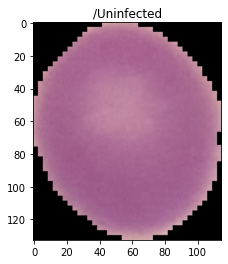

In [24]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(img)

    plt.title(target_class)

    print(f"Image shape: {img.shape}")

    return img

uninfected_images = view_random_image(target_dir=r"C:\Users\kgajera\Music\600\PROJECT\cell_images",
                                       target_class="/Uninfected")


Image shape: (220, 226, 3)


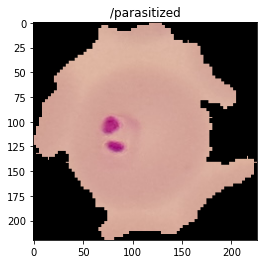

In [26]:
parasitized_images = view_random_image(target_dir=r"C:\Users\kgajera\Music\600\PROJECT\cell_images",
                                       target_class="/parasitized")

In [33]:
def plot_loss_curve(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history[ accuracy]
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

# plot Loss

    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')

    plt.title('Loss')

    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')

    plt.plot(epochs, val_accuracy, label='Validation Accuracy')

    plt.xlabel('Epochs')
    plt.title('Accuracy')
    plt.legend()


In [48]:
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

data_aug = keras.layers.experimental.preprocessing.Rescaling(1./255) (inp)
convl = Conv2D(32, kernel_size=3, activation="relu",
               padding="same")(data_aug)
pooll = MaxPooling2D(2)(convl)
norml = BatchNormalization(axis= -1)(pooll)
dropl = Dropout(0.2)(norml)

conv2 = Conv2D(32, kernel_size=3, activation="relu",
               padding="same")(dropl)
pool2 = MaxPooling2D(2)(conv2)
norm2 = BatchNormalization(axis= -1)(pool2)
drop2 = Dropout(0.2)(norm2)

flat = Flatten()(drop2)

hidden1 = Dense(512, activation="relu")(flat)
norm3 = BatchNormalization(axis= -1)(hidden1)
drop3 = Dropout(0.2)(norm3)

hidden2 = Dense(512, activation="relu")(drop3)
norm4 = BatchNormalization(axis= -1)(hidden2)
drop4 = Dropout(0.2)(norm4)

out = Dense(2, activation="sigmoid")(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
print(model.summary())


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 32, 32, 32)        0   

In [54]:

historyl = model.fit(train_ds,
                       epochs=10,
                       steps_per_epoch=len(train_ds),
                       validation_data=val_ds,
                       validation_steps=len(val_ds))
                       

Epoch 1/10
689/689 [==============================] - 96s 136ms/step - loss: 0.5653 - accuracy: 0.7411 - val_loss: 0.3118 - val_accuracy: 0.8784
Epoch 2/10
689/689 [==============================] - 108s 156ms/step - loss: 0.2553 - accuracy: 0.9021 - val_loss: 0.1855 - val_accuracy: 0.9403
Epoch 3/10
689/689 [==============================] - 120s 175ms/step - loss: 0.1968 - accuracy: 0.9299 - val_loss: 0.1737 - val_accuracy: 0.9310
Epoch 4/10
689/689 [==============================] - 118s 172ms/step - loss: 0.1662 - accuracy: 0.9411 - val_loss: 0.1644 - val_accuracy: 0.9412
Epoch 5/10
689/689 [==============================] - 130s 189ms/step - loss: 0.1471 - accuracy: 0.9482 - val_loss: 0.4971 - val_accuracy: 0.8790
Epoch 6/10
689/689 [==============================] - 136s 197ms/step - loss: 0.1396 - accuracy: 0.9517 - val_loss: 0.1299 - val_accuracy: 0.9541
Epoch 7/10
689/689 [==============================] - 127s 184ms/step - loss: 0.1282 - accuracy: 0.9542 - val_loss: 0.1771 - 

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(historyl):
    # Get training and validation loss values
    loss = historyl.history['loss']
    val_loss = historyl.history['val_loss']

    # Get training and validation accuracy values
    accuracy = historyl.history['accuracy']
    val_accuracy = historyl.history['val_accuracy']

    # Plot the loss curves
    plt.figure(figsize=(8, 6))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the accuracy curves
    plt.figure(figsize=(8, 6))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()


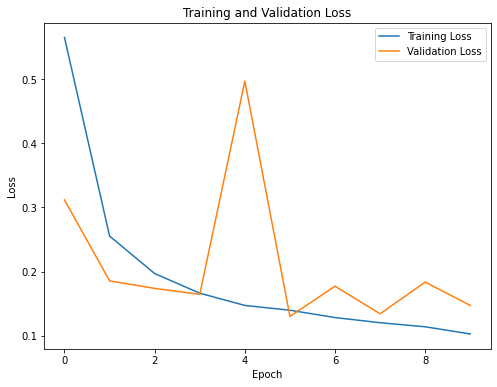

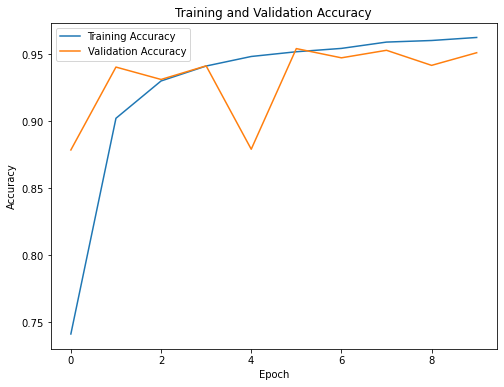

In [89]:
plot_loss_curve(historyl)

In [83]:
result = model.evaluate(val_ds)

173/173 [==============================] - 6s 33ms/step - loss: 0.1470 - accuracy: 0.9510


In [92]:
model.save('malaria.h5')

In [144]:
test_image = r"C:/Users/kgajera/Music/600/PROJECT/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png"



In [149]:
import pandas as pd 
import numpy as np 
import os

#To allow markdowns in Python Cells: 
from IPython.display import display, Markdown 
# display (Markdown("# Hello world!"))

#To Plot Pretty Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12) 
%matplotlib inline

# allowing for any single variable to print out without using the print statement: 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [152]:
# Path to access images
from pathlib import Path

from tensorflow import keras
# in-built keras image pre-processing library 
from keras.preprocessing import image

# Path to folders with trainin g data
parasitized_path = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Parasitized'
not_parasitized_path = Path(r'C:\Users\kgajera\Music\600\PROJECT\cell_images') / 'Uninfected'

# making sure the directories exist 
parasitized_path.is_dir() 
not_parasitized_path.is_dir()


True

True

In [155]:
# import library to resize images: 
from skimage import transform
# setting the new shape of image: 
new_shape = (50, 50, 3)

In [159]:
import warnings;
warnings.filterwarnings('ignore');
from tensorflow.keras.preprocessing import image

# Load all the non-malaria images and setting their y label as 0 
for img in not_parasitized_path.glob("*.png"):



    # Load the image from disk
    img = keras.preprocessing.image.load_img(img)

    # Convert the image to a numpy array
    image_array = keras.preprocessing.image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values: 
    image_array /= 255
    
    # Add the image to the list of images
    images.append(image_array)
    
    # For each 'not parasitized' image, the expected value should be o
    labels.append(0)

In [134]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 320, 240

# load the model we saved
model = load_model('malaria.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



1/1 [==============================] - 1s 1s/step
The given blood cell is Parasitic


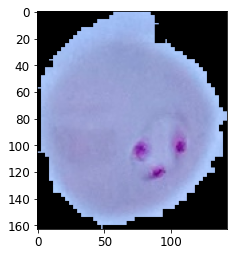

In [161]:
def load(filename):
    img = cv2.imread(filename)
    plt.imshow(img)
    img = image.load_img(filename, target_size=(SIZE, SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    index = model.predict(img)
    index = index.argmax().item()
    if index == 0:
        return "Parasitic"
    elif index == 1:
        return "Non-Parasitic"
    else:
        return None
image = load(test_image)
print('The given blood cell is', image)
